In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import kruskal
import statsmodels.api as sm

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
bank_data=pd.read_csv(r'.\Downloads\bank_data.csv')

In [15]:
bank_data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


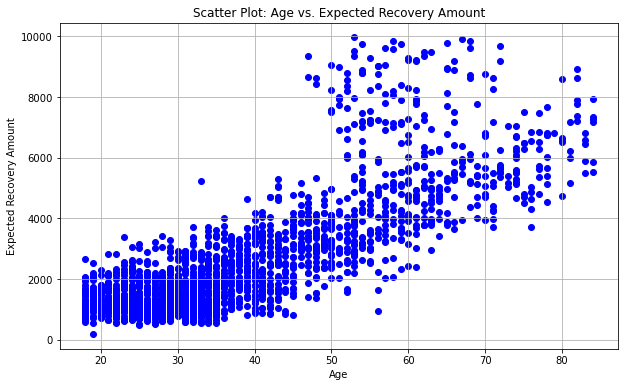

In [16]:


# Scatter plot for age vs. expected recovery amount
plt.figure(figsize=(10, 6))
plt.scatter(bank_data['age'], bank_data['expected_recovery_amount'], color='blue')
plt.title('Scatter Plot: Age vs. Expected Recovery Amount')
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.grid(True)
plt.show()


In [17]:


# Define the threshold value
threshold = 1000

# Create two groups: above_threshold and below_threshold
above_threshold = bank_data[bank_data['expected_recovery_amount'] > threshold]['age']
below_threshold = bank_data[bank_data['expected_recovery_amount'] <= threshold]['age']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(above_threshold, below_threshold)

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 13.759810322222165
P-value: 4.071778578392043e-41


In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table for sex and recovery amount threshold
contingency_table = pd.crosstab(bank_data['sex'], bank_data['expected_recovery_amount'] > threshold)

# Perform a chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the chi-squared statistic and p-value
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-squared Statistic: 2.1768676619404688
P-value: 0.14009934427173568


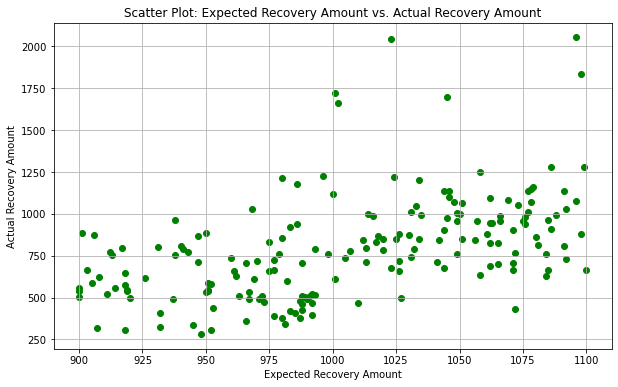

In [19]:
# Filter data for expected recovery amount between $900 and $1100
subset_data = bank_data[(bank_data['expected_recovery_amount'] >= 900) & (bank_data['expected_recovery_amount'] <= 1100)]

# Scatter plot for Expected Recovery Amount vs. Actual Recovery Amount
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['expected_recovery_amount'], subset_data['actual_recovery_amount'], color='green')
plt.title('Scatter Plot: Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.grid(True)
plt.show()


In [20]:


# Create two groups: above_threshold and below_threshold
above_threshold = bank_data[bank_data['expected_recovery_amount'] > threshold]['actual_recovery_amount']
below_threshold = bank_data[bank_data['expected_recovery_amount'] <= threshold]['actual_recovery_amount']

# Perform a Kruskal-Wallis test to compare the distributions
statistic, p_value = kruskal(above_threshold, below_threshold)

# Display the test statistic and p-value
print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Statistic: 605.3856285255124
P-value: 1.1282117429916347e-133


In [21]:


# Define the dependent (Y) and independent (X) variables
X = bank_data['expected_recovery_amount']
Y = bank_data['actual_recovery_amount']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model_no_threshold = sm.OLS(Y, X).fit()

# Display the regression summary
print(model_no_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            09:08:54   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
# Create an indicator variable for the threshold
bank_data['above_threshold'] = (bank_data['expected_recovery_amount'] > threshold).astype(int)

# Define the dependent (Y) and independent (X) variables
X_with_threshold = bank_data[['expected_recovery_amount', 'above_threshold']]
Y_with_threshold = bank_data['actual_recovery_amount']

# Add a constant term to the independent variables
X_with_threshold = sm.add_constant(X_with_threshold)

# Fit the regression model
model_with_threshold = sm.OLS(Y_with_threshold, X_with_threshold).fit()

# Display the regression summary
print(model_with_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            09:08:55   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
# Define the new threshold values
lower_threshold = 950
upper_threshold = 1050

# Create indicator variables for the new thresholds
# Define the new threshold values
lower_threshold = 950
upper_threshold = 1050

# Create indicator variables for the new thresholds
bank_data['above_lower_threshold'] = (bank_data['expected_recovery_amount'] > lower_threshold).astype(int)
bank_data['above_upper_threshold'] = (bank_data['expected_recovery_amount'] > upper_threshold).astype(int)

# Define the dependent (Y) and independent (X) variables for lower threshold
X_lower_threshold = bank_data[['expected_recovery_amount', 'above_lower_threshold']]
Y_lower_threshold = bank_data['actual_recovery_amount']
X_lower_threshold = sm.add_constant(X_lower_threshold)

# Define the dependent (Y) and independent (X) variables for upper threshold
X_upper_threshold = bank_data[['expected_recovery_amount', 'above_upper_threshold']]
Y_upper_threshold = bank_data['actual_recovery_amount']
X_upper_threshold = sm.add_constant(X_upper_threshold)

# Fit regression models for lower and upper thresholds
model_lower_threshold = sm.OLS(Y_lower_threshold, X_lower_threshold).fit()
model_upper_threshold = sm.OLS(Y_upper_threshold, X_upper_threshold).fit()

# Display regression summaries for lower and upper thresholds
print("Regression Model Summary for Lower Threshold:")
print(model_lower_threshold.summary())

print("\nRegression Model Summary for Upper Threshold:")
print(model_upper_threshold.summary())
bank_data['above_lower_threshold'] = (bank_data['expected_recovery_amount'] > lower_threshold).astype(int)
bank_data['above_upper_threshold'] = (bank_data['expected_recovery_amount'] > upper_threshold).astype(int)

# Define the dependent (Y) and independent (X) variables for lower threshold
X_lower_threshold = bank_data[['expected_recovery_amount', 'above_lower_threshold']]
Y_lower_threshold = bank_data['actual_recovery_amount']
X_lower_threshold = sm.add_constant(X_lower_threshold)

# Define the dependent (Y) and independent (X) variables for upper threshold
X_upper_threshold = bank_data[['expected_recovery_amount', 'above_upper_threshold']]
Y_upper_threshold = bank_data['actual_recovery_amount']
X_upper_threshold = sm.add_constant(X_upper_threshold)

# Fit regression models for lower and upper thresholds
model_lower_threshold = sm.OLS(Y_lower_threshold, X_lower_threshold).fit()
model_upper_threshold = sm.OLS(Y_upper_threshold, X_upper_threshold).fit()

# Display regression summaries for lower and upper thresholds
print("Regression Model Summary for Lower Threshold:")
print(model_lower_threshold.summary())

print("\nRegression Model Summary for Upper Threshold:")
print(model_upper_threshold.summary())


Regression Model Summary for Lower Threshold:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4237.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            09:08:55   Log-Likelihood:                -16927.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.388e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Sensitivity Analysis Results:

Lower Threshold ($950):

-  Regression Coefficient for Expected Recovery Amount: This coefficient represents the change in actual recovery amount for a one-unit change in expected recovery amount. Is it statistically significant?
-Regression Coefficient for the Indicator Variable: This coefficient represents the change in actual recovery amount when the expected recovery amount is above the lower threshold ($950). Is it statistically significant?
-Adjusted R-squared: This metric tells us the proportion of the variance in the dependent variable that is predictable from the independent variables. How well does the model fit the data?

Upper Threshold ($1050):

-  Similar to the analysis for the lower threshold, we'll examine the regression coefficients and adjusted R-squared for the upper threshold.
-Based on the results of the sensitivity analysis, we'll be able to draw conclusions about the impact of the recovery strategy at different thresholds. Specifically, we'll be looking at whether there is a significant difference in actual recovery amounts -when the expected recovery amount is above the lower threshold and whether this difference is consistent at both the lower and upper thresholds.